In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os 

In [3]:
df = pd.read_csv(os.path.join("Resources", "got.csv"))

In [4]:
df.shape

(38, 25)

In [7]:
df.head(10)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN
6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Darry,...,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands,NaN
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North,NaN
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North,NaN
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,264.0,NaN,Theon Greyjoy,NaN,1.0,Stony Shore,The North,Greyjoy's troop number based on the Battle of ...


In [16]:
attacker_df = df["attacker_king"].value_counts().to_frame()
defender_df = df["defender_king"].value_counts().to_frame()

In [17]:
attacker_df

,attacker_king
Joffrey/Tommen Baratheon,14
Robb Stark,10
Balon/Euron Greyjoy,7
Stannis Baratheon,5


In [18]:
defender_df

,defender_king
Robb Stark,14
Joffrey/Tommen Baratheon,13
Balon/Euron Greyjoy,4
Stannis Baratheon,2
Mance Rayder,1
Renly Baratheon,1


In [33]:
df =pd.merge(attacker_df,
             defender_series,
             left_index=True, 
             right_index=True, 
             how="outer"
).fillna(0)

In [41]:
df

,attacker_king,defender_king,king
Balon/Euron Greyjoy,7.0,4,11.0
Joffrey/Tommen Baratheon,14.0,13,27.0
Mance Rayder,0.0,1,1.0
Renly Baratheon,0.0,1,1.0
Robb Stark,10.0,14,24.0
Stannis Baratheon,5.0,2,7.0


In [46]:
df = df.assign(king = df["attacker_king"]+df["defender_king"])\
    .rename(columns = {
    "attacker_king":"Times attacker",
    "defender_king":"Times defender",
    "king":"times Participant"
})

In [47]:
df

,Times attacker,Times defender,times Participant
Balon/Euron Greyjoy,7.0,4,11.0
Joffrey/Tommen Baratheon,14.0,13,27.0
Mance Rayder,0.0,1,1.0
Renly Baratheon,0.0,1,1.0
Robb Stark,10.0,14,24.0
Stannis Baratheon,5.0,2,7.0


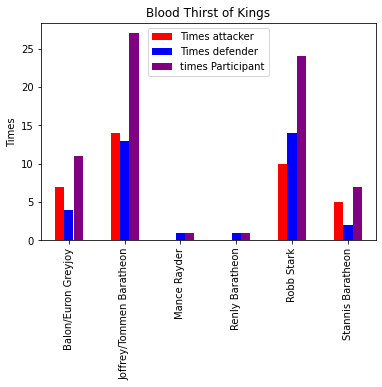

In [60]:
df.plot(kind="bar",
       color=["red", "blue", "purple"]
       )
plt.title("Blood Thirst of Kings")
plt.ylabel("Times")
plt.show()